# Homework 01  
Goal: Implement polynomial curve fitting in python and with TensorFlow (optionally).  
## Requirements  
* Programming lanuage: python3
* Optional package: tensorflow web or pytorch
* Plot the results in matplotlib Introduction in Chinese Tutorial

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Sample the function curve of y=sin(x) with Gaussian noise

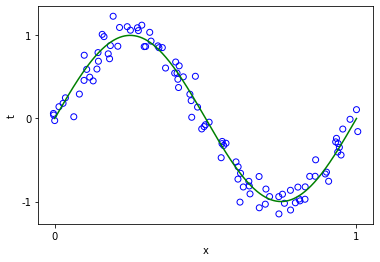

In [2]:
def gaussian_fitting(num_sample, mu=0, sigma=0.1):
    x = np.linspace(0, 2 * np.pi, num_sample, endpoint=True)
    y = np.sin(x)

    x[1: -1] += np.random.randn(num_sample - 2) * sigma + mu
    y += np.random.randn(num_sample) * sigma + mu
    return x, y

def init_plot():
    plt.xlabel('x')
    plt.xticks([0, 2 * np.pi], ['0', '1'])
    plt.ylabel('t')
    plt.yticks([-1, 0, 1], ['-1', '0', '1'])
    x = np.arange(0, 2 * np.pi, 0.001)
    y = np.sin(x)
    plt.plot(x, y, color='green')

init_plot()
x, y = gaussian_fitting(num_sample=100)
plt.scatter(x, y, marker='o', color='none', edgecolor='blue')
plt.show()

## 2. Fit degree 3 and 9 curves in 10 samples

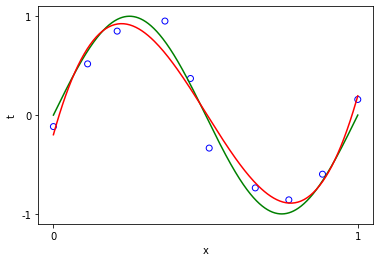

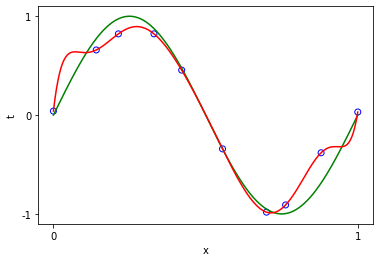

In [3]:
def polynomial_fitting(num_sample, degree):
    x, y = gaussian_fitting(num_sample)
    plt.scatter(x, y, marker='o', color='none', edgecolor='blue')
    H = np.ones((num_sample, degree + 1))
    for i in range(degree):
        H[:, i+1] = H[:, i] * x
    w = np.linalg.inv(H.T @ H) @ H.T @ y
    
    x = np.linspace(0, 2 * np.pi, 200, endpoint=True)
    H = np.ones((200, degree + 1))
    for i in range(degree):
        H[:, i+1] = H[:, i] * x
    y = H @ w
    plt.plot(x, y, color='red')

init_plot()
polynomial_fitting(num_sample=10, degree=3)
plt.show()
init_plot()
polynomial_fitting(num_sample=10, degree=9)
plt.show()

## 3. Fit degree 9 curves in 15 and 100 samples

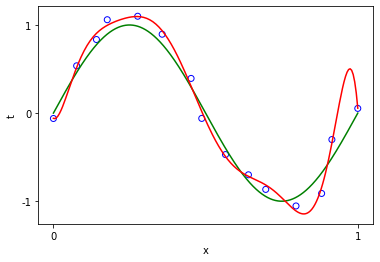

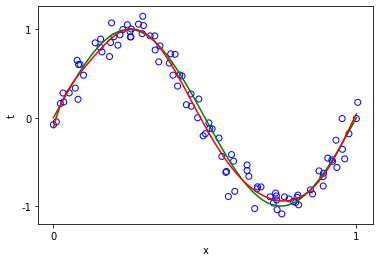

In [4]:
init_plot()
polynomial_fitting(num_sample=15, degree=9)
plt.show()
init_plot()
polynomial_fitting(num_sample=100, degree=9)
plt.show()

## 4. Fit degree 9 curve in 10 samples but with regularization term

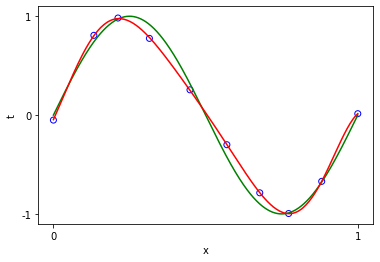

In [5]:
def polynomial_reg_fitting(num_sample, degree, reg):
    x, y = gaussian_fitting(num_sample)
    plt.scatter(x, y, marker='o', color='none', edgecolor='blue')
    H = np.ones((num_sample, degree + 1))
    for i in range(degree):
        H[:, i+1] = H[:, i] * x
    w = np.linalg.inv(H.T @ H + reg * np.eye(degree + 1)) @ H.T @ y
    
    x = np.linspace(0, 2 * np.pi, 200, endpoint=True)
    H = np.ones((200, degree + 1))
    for i in range(degree):
        H[:, i+1] = H[:, i] * x
    y = H @ w
    plt.plot(x, y, color='red')

init_plot()
polynomial_reg_fitting(num_sample=10, degree=9, reg=np.exp(-6))
plt.show()